In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem

import matplotlib.patches as mpatches

DATA_FILE_MODEL = "model_results_mild.csv"

df_model = pd.read_csv(DATA_FILE_MODEL)

from plot_utils import *

In [2]:
def plot_model(data, plt_dir, palette):
    """
    """
    plt.rcParams["font.family"] = "Avenir"
    plt.rcParams["font.size"] = 24
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    bar_width = 0.35
    error_bar_color = 'black'
    index = np.arange(len(data))
    
    for i, key in enumerate(data.keys()):

        # Calculate mean for '0' and '1' keys
        mean_0 = np.mean(data[key]['0'])
        mean_1 = np.mean(data[key]['1'])
        error_0 = sem(data[key]['0'])
        error_1 = sem(data[key]['1'])
        
        
        ax.bar(index[i] - bar_width / 2, mean_0, bar_width, label=f"{key} - 0", color=change_saturation(palette[0]))
        ax.bar(index[i] + bar_width / 2, mean_1, bar_width, label=f"{key} - 1", color=change_saturation(palette[1]))

    for patch in ax.patches:
        bb = patch.get_bbox()
        color = patch.get_facecolor()
        p_bbox = get_fancy_bbox(bb, "round,pad=-0.005,rounding_size=0.025", color, mutation_aspect=2)
        patch.remove()
        ax.add_patch(p_bbox)


    
    # Removing box
    sns.despine(left=True, bottom=False)
    plt.xlabel('')
    
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_xticks(index)
   
    ax.set_xticklabels(['gpt4', 'gpt4-cot', 'gpt4-cot-kant', 'gpt4-cot-util'], size=15)

    plt.title(plt_dir.split('/')[-1].replace('_', ' ').title(), size=24)
    
    
    
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5, zorder=-100)
    ax.set_ylabel('Average Rating')
    ax.yaxis.set_label_coords(-0.05, 0.5)
    plt.tick_params(axis='y', length=0)
    plt.ylim(0, 5.5)
    # add legend for the two colors

   
    legend_structure = ["side effect", "means"]
    legend_evitability = ["inevitable", "evitable"]
    legend_action = ["no prevention", "action"]
    legend_colors = [palette[0], palette[1]]

    if 'structure' in plt_dir:
        legend_labels = legend_structure
    elif 'evitability' in plt_dir:
        legend_labels = legend_evitability
    elif 'action' in plt_dir:
        legend_labels = legend_action
    
    # add legend for the two colors
    legend_patches = [mpatches.Patch(color=c, label=l) for c, l in zip(legend_colors, legend_labels)]
    plt.legend(handles=legend_patches, loc='upper left', frameon=False, bbox_to_anchor=(1, 1))
    
    
    fig.tight_layout()
    # save
    # plt.savefig(f'{plt_dir}.pdf')
    # plt.savefig(f'{plt_dir}.png', dpi=300)
    plt.show()

## CAUSAL STRUCTURE 

### Evitability = Evitable, Action = Action_Yes

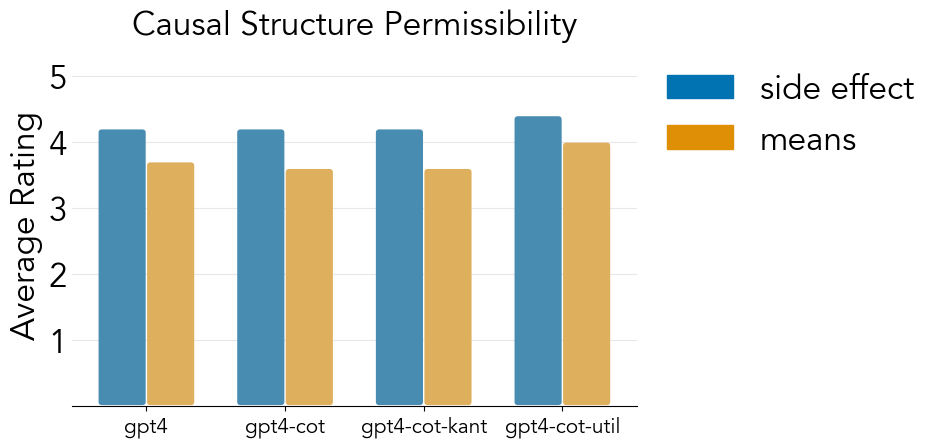

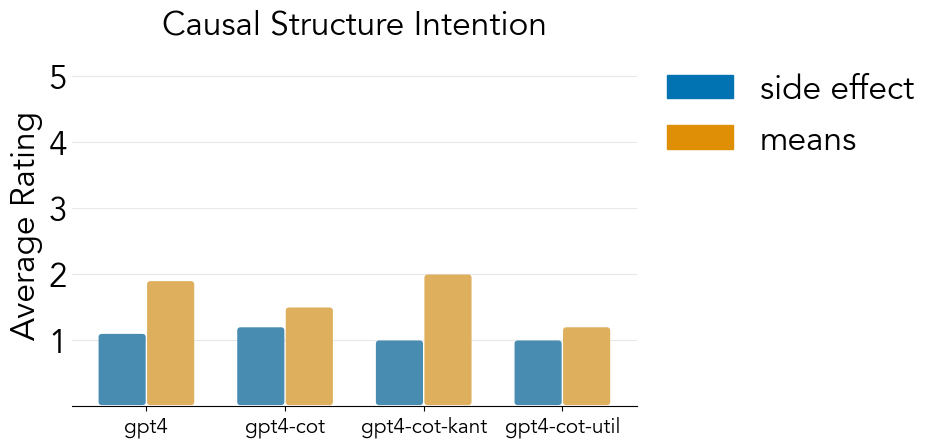

In [3]:
palette = sns.color_palette('colorblind')
data1 = prepare_data(df_model, df_model, 'causal_structure', [0, 1], 'permissibility_rating', ['evitability', 'action'], [1, 1])
plot_model(data1, 'plots/causal_structure_permissibility', palette)
data2 = prepare_data(df_model, df_model, 'causal_structure', [0, 1], 'intention_rating', ['evitability', 'action'], [1, 1])
plot_model(data2, 'plots/causal_structure_intention', palette)

## Evitability

### Causal Structure = Means, Action = Action_Yes

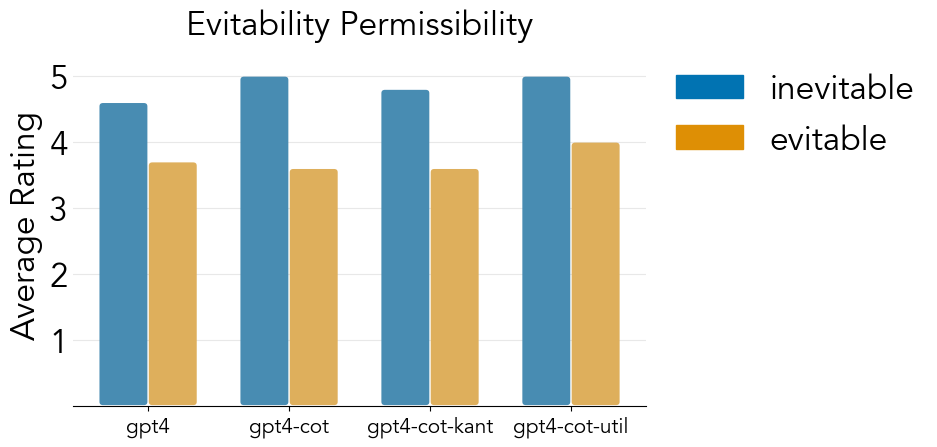

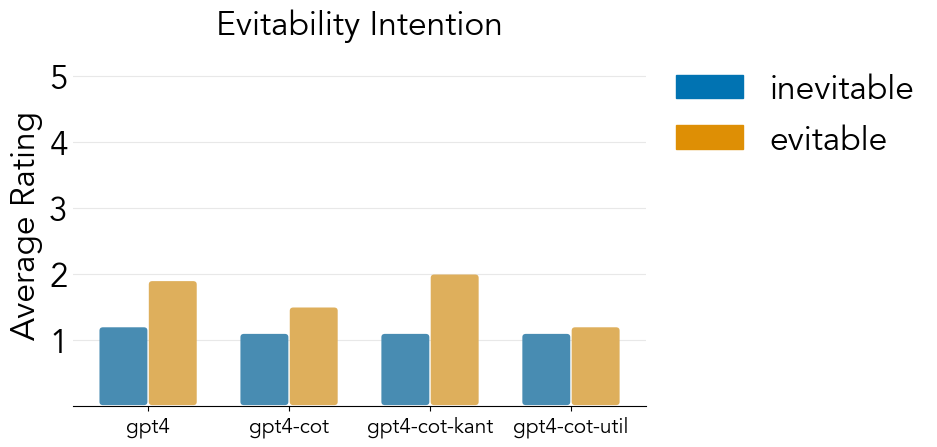

In [4]:
palette = sns.color_palette('colorblind')
data1 = prepare_data(df_model, df_model, 'evitability', [0, 1], 'permissibility_rating', ['causal_structure', 'action'], [1, 1])
plot_model(data1, 'plots/evitability_permissibility', palette)
data2 = prepare_data(df_model, df_model, 'evitability', [0, 1], 'intention_rating' , ['causal_structure', 'action'], [1, 1])
plot_model(data2, 'plots/evitability_intention', palette)

## Action

### Causal Structure = Side Effect, Evitability = Inevitable

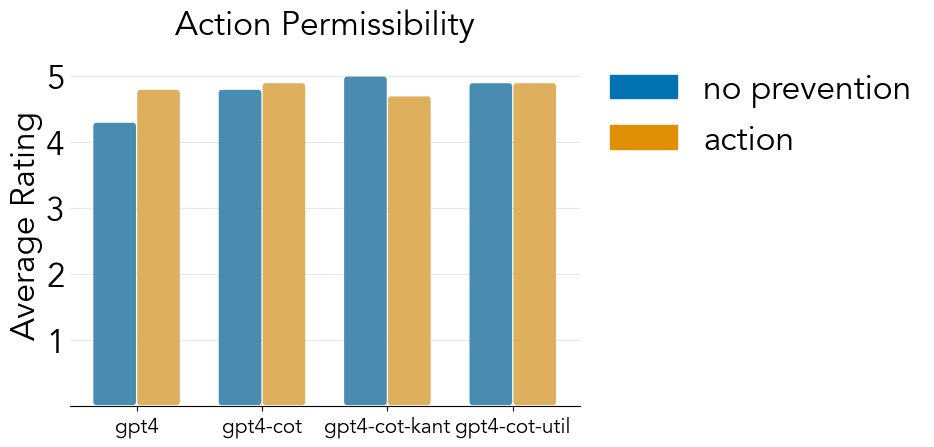

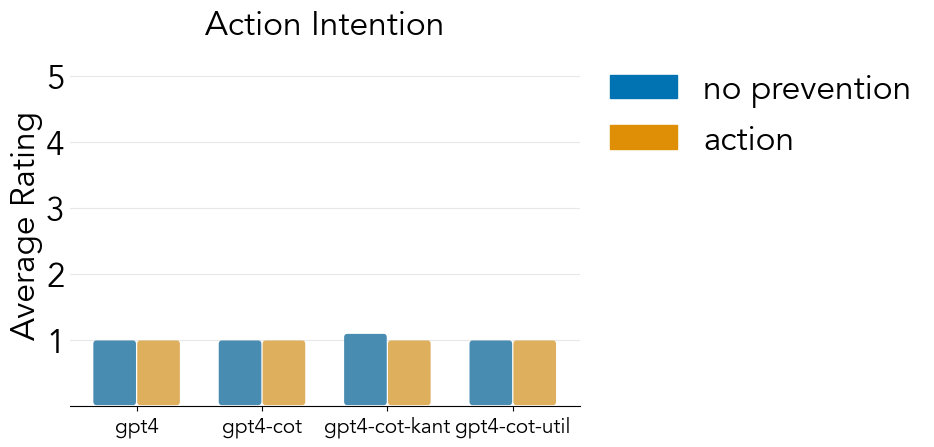

In [5]:
palette = sns.color_palette('colorblind')
data1 = prepare_data(df_model, df_model, 'action', [0, 1], 'permissibility_rating', ['causal_structure', 'evitability'], [0, 0])
plot_model(data1, 'plots/action_permissibility', palette)
data2 = prepare_data(df_model, df_model, 'action', [0, 1], 'intention_rating', ['causal_structure', 'evitability'], [0, 0])
plot_model(data2, 'plots/action_intention', palette)

### Causal Structure = Means, Evitability = Inevitable

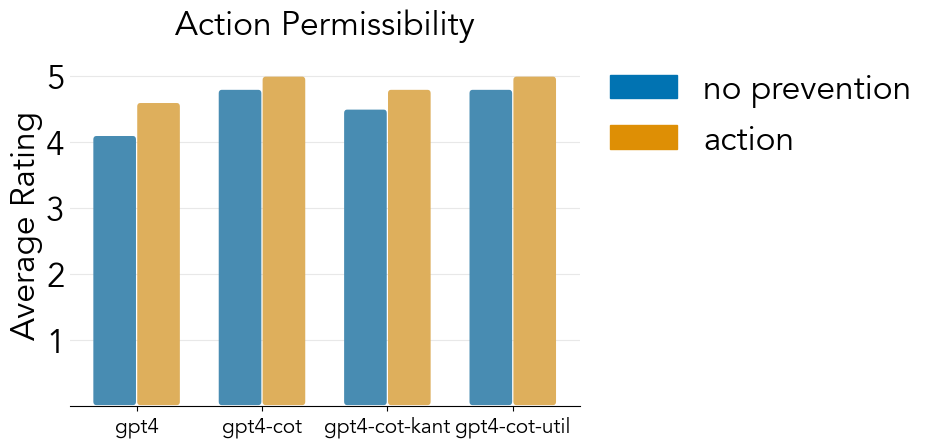

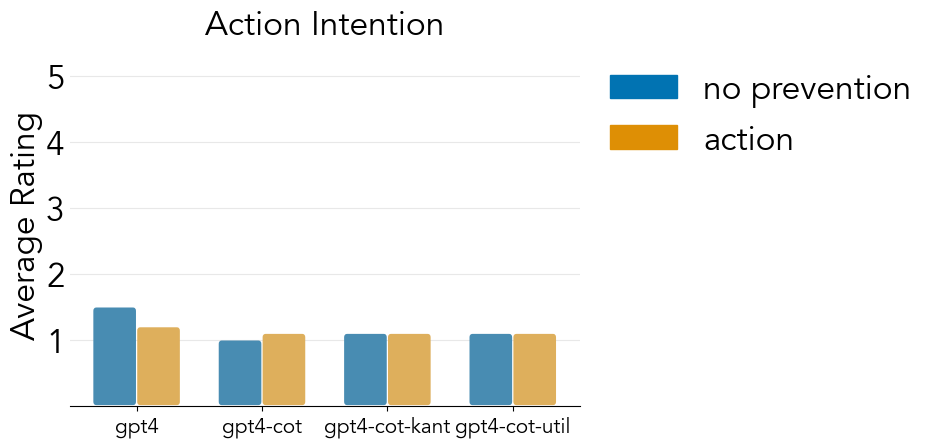

In [6]:
palette = sns.color_palette('colorblind')
data1 = prepare_data(df_model, df_model, 'action', [0, 1], 'permissibility_rating', ['causal_structure', 'evitability'], [1, 0])
plot_model(data1, 'plots/action_permissibility', palette)
data2 = prepare_data(df_model, df_model, 'action', [0, 1], 'intention_rating', ['causal_structure', 'evitability'], [1, 0])
plot_model(data2, 'plots/action_intention', palette)

### Causal Structure = Means, Evitability = Evitable

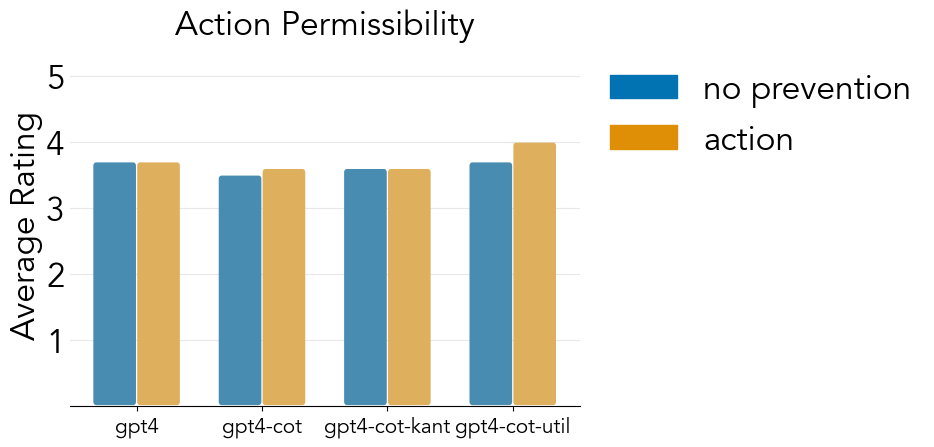

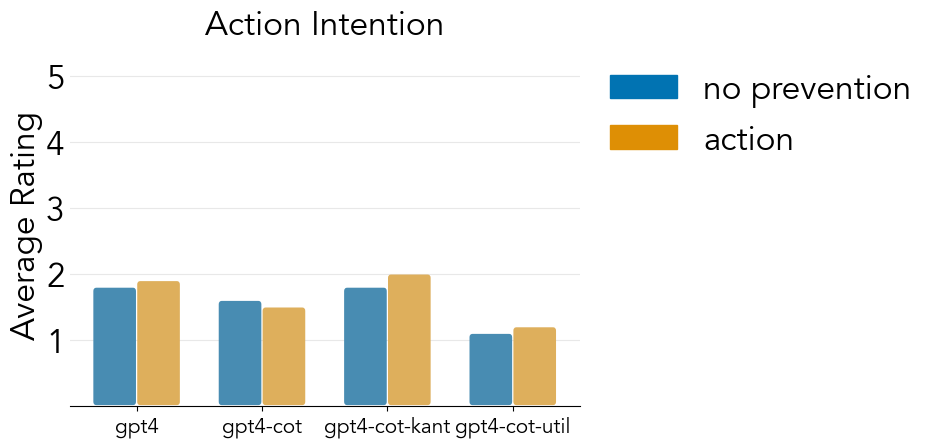

In [7]:
palette = sns.color_palette('colorblind')
data1 = prepare_data(df_model, df_model, 'action', [0, 1], 'permissibility_rating', ['causal_structure', 'evitability'], [1, 1])
plot_model(data1, 'plots/action_permissibility', palette)
data2 = prepare_data(df_model, df_model, 'action', [0, 1], 'intention_rating', ['causal_structure', 'evitability'], [1, 1])
plot_model(data2, 'plots/action_intention', palette)

### Causal Structure = Side Effect, Evitability = Evitable

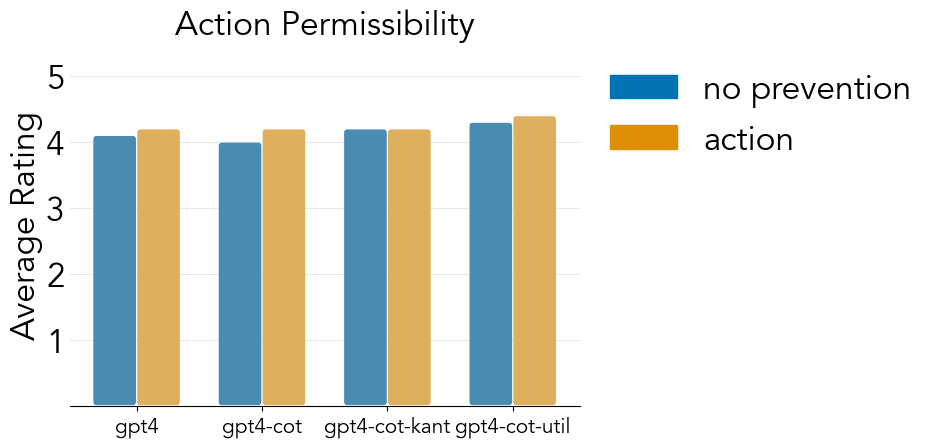

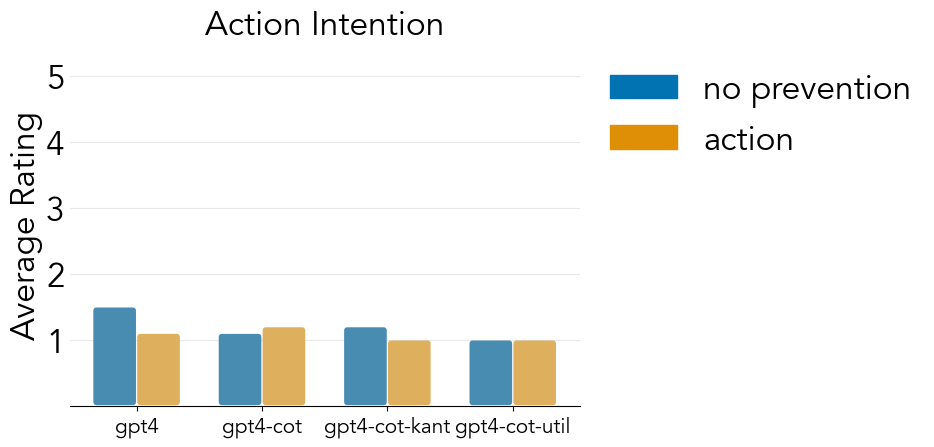

In [8]:
palette = sns.color_palette('colorblind')
data1 = prepare_data(df_model, df_model, 'action', [0, 1], 'permissibility_rating', ['causal_structure', 'evitability'], [0, 1])
plot_model(data1, 'plots/action_permissibility', palette)
data2 = prepare_data(df_model, df_model, 'action', [0, 1], 'intention_rating', ['causal_structure', 'evitability'], [0, 1])
plot_model(data2, 'plots/action_intention', palette)